In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [236]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("ntt.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  381 non-null    datetime64[ns]
 1   Tn       376 non-null    float64       
 2   Tx       375 non-null    float64       
 3   Tavg     374 non-null    float64       
 4   RH_avg   374 non-null    float64       
 5   RR       356 non-null    float64       
 6   ss       376 non-null    float64       
 7   ff_x     376 non-null    float64       
 8   ddd_x    376 non-null    float64       
 9   ff_avg   376 non-null    float64       
 10  ddd_car  376 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 32.9+ KB


<ipython-input-236-c382af919d94>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [237]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.2,31.8,10.4,28.9
1,2023-02-01,27.2,32.3,0.0,29.8
2,2023-03-01,27.4,30.0,8888.0,28.7
3,2023-04-01,24.6,31.4,28.2,28.5
4,2023-05-01,27.0,31.8,2.1,29.5
...,...,...,...,...,...
376,2023-12-16,24.9,33.0,0.0,29.5
377,2023-12-17,25.8,33.4,0.0,27.1
378,2023-12-18,23.1,32.3,12.6,28.5
379,2023-12-19,25.4,33.0,0.0,28.3


In [238]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

53

In [239]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [240]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [241]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.2,31.8,10.4,28.9
1,31,31,2023-01-02,25.0,32.0,14.4,28.7
2,59,60,2023-01-03,25.7,30.6,1.9,28.3
3,90,92,2023-01-04,24.4,32.4,23.9,28.5
4,120,123,2023-01-05,23.5,32.2,0.0,28.4
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,27.1,33.0,0.0,30.5
350,350,377,2023-12-17,25.8,33.4,0.0,27.1
351,351,378,2023-12-18,23.1,32.3,12.6,28.5
352,352,379,2023-12-19,25.4,33.0,0.0,28.3


In [242]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          5
Tx          6
RR         25
Tavg        7
dtype: int64

In [243]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       5
dtype: int64

In [244]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

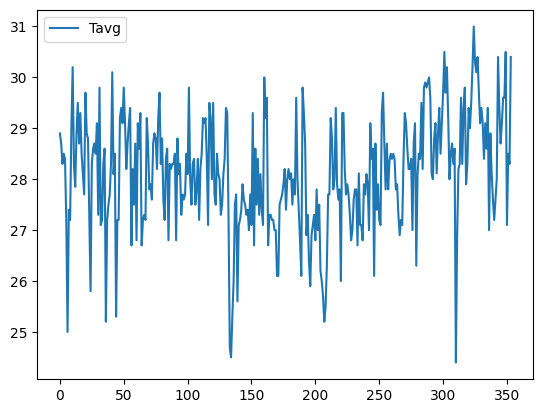

In [245]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

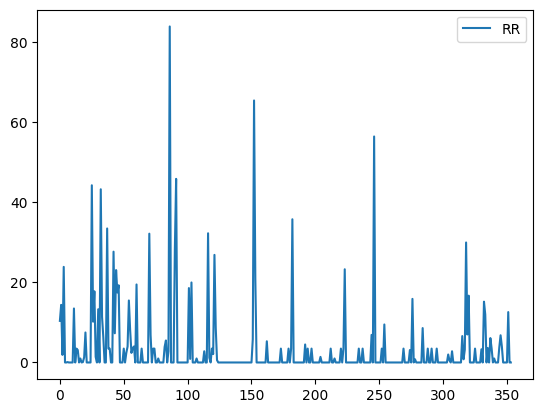

In [246]:
#plotting tavg
df1[['RR']].plot()

In [247]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.2,31.8,10.4,28.9,32.0,28.7,14.4
1,31,31,2023-01-02,25.0,32.0,14.4,28.7,30.6,28.3,1.9
2,59,60,2023-01-03,25.7,30.6,1.9,28.3,32.4,28.5,23.9
3,90,92,2023-01-04,24.4,32.4,23.9,28.5,32.2,28.4,0.0
4,120,123,2023-01-05,23.5,32.2,0.0,28.4,31.4,27.2,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,27.1,33.0,0.0,30.5,33.4,27.1,0.0
350,350,377,2023-12-17,25.8,33.4,0.0,27.1,32.3,28.5,12.6
351,351,378,2023-12-18,23.1,32.3,12.6,28.5,33.0,28.3,0.0
352,352,379,2023-12-19,25.4,33.0,0.0,28.3,32.8,30.4,0.0


In [248]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,10.4,28.9,28.7,14.4
1,14.4,28.7,28.3,1.9
2,1.9,28.3,28.5,23.9
3,23.9,28.5,28.4,0.0
4,0.0,28.4,27.2,0.0
...,...,...,...,...
349,0.0,30.5,27.1,0.0
350,0.0,27.1,28.5,12.6
351,12.6,28.5,28.3,0.0
352,0.0,28.3,30.4,0.0


In [249]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,10.4,28.9,28.7,14.4
1,14.4,28.7,28.3,1.9
2,1.9,28.3,28.5,23.9
3,23.9,28.5,28.4,0.0
4,0.0,28.4,27.2,0.0
...,...,...,...,...
348,0.0,29.6,30.5,0.0
349,0.0,30.5,27.1,0.0
350,0.0,27.1,28.5,12.6
351,12.6,28.5,28.3,0.0


In [250]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [251]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,10.4,28.9,28.7,14.4,0
1,14.4,28.7,28.3,1.9,1
2,1.9,28.3,28.5,23.9,2
3,23.9,28.5,28.4,0.0,3
4,0.0,28.4,27.2,0.0,4
...,...,...,...,...,...
348,0.0,29.6,30.5,0.0,348
349,0.0,30.5,27.1,0.0,349
350,0.0,27.1,28.5,12.6,350
351,12.6,28.5,28.3,0.0,351


In [252]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [253]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [254]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [255]:
X_test

,Indeks,Tavg
282,282,28.4
283,283,29.5
284,284,28.2
285,285,29.8
286,286,29.9
...,...,...
348,348,29.6
349,349,30.5
350,350,27.1
351,351,28.5


In [256]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.92199494, 28.33178255, 27.84495276, 28.44153566, 28.47773268,
       28.43921159, 28.47540862, 28.51160564, 28.36100738, 27.80513292,
       27.76093839, 28.05864882, 28.16956396, 27.80048479, 28.09252178,
       28.27815504, 27.94076149, 28.1637538 , 28.38674612, 28.68445655,
       28.38442205, 28.57005531, 28.1953027 , 27.74583197, 27.93146523,
       28.00502131, 27.85442305, 27.96533819, 26.39509573, 27.32791014,
       27.81241586, 27.84861289, 28.33311861, 27.84628882, 28.25607643,
       28.40435063, 27.6933665 , 27.8416407 , 28.2514283 , 28.10083004,
       28.28646329, 28.54681467, 28.8445251 , 28.58184966, 28.50596951,
       28.61688465, 28.35420922, 28.12889284, 28.23980798, 28.12656877,
       27.86389334, 28.12424471, 27.93628739, 28.23399782, 27.3362184 ,
       28.04487846, 27.75051741, 27.55688665, 27.40628839, 27.55456258,
       27.70283678, 28.59829214, 28.22353953, 27.96086409, 28.10913829,
       28.29477155, 28.29360951, 28.628679  , 27.35730901, 27.87

In [257]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.103454161411221 1.7200094367902414


In [258]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,28.4
283,283,29.5
284,284,28.2
285,285,29.8
286,286,29.9
...,...,...
348,348,29.6
349,349,30.5
350,350,27.1
351,351,28.5


In [259]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.921995
283,28.331783
284,27.844953
285,28.441536
286,28.477733
...,...
348,28.293610
349,28.628679
350,27.357309


In [260]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-260-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.9,NaN
1,28.7,NaN
2,28.3,NaN
3,28.5,NaN
4,28.4,NaN
...,...,...
348,29.6,28.293610
349,30.5,28.628679
350,27.1,27.357309
351,28.5,27.879174


<Axes: >

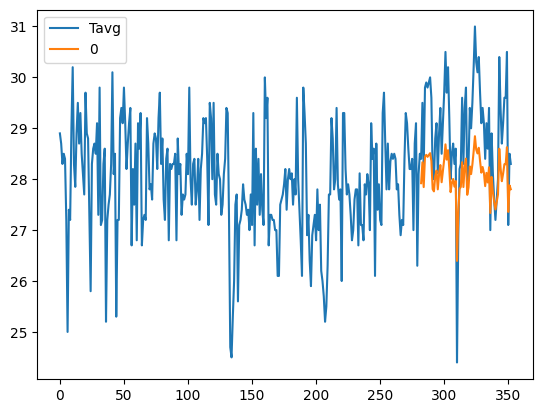

In [261]:
kan.plot()

In [262]:
new_data = [[354, 28.3],[355,28.3],[356,28.3],[357,28.3],[358,28.3],[359,28.3],[360,28.3]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.80096957, 27.79980754, 27.79864551, 27.79748347, 27.79632144,
       27.79515941, 27.79399738])

In [264]:
kan.to_json('Prediksi NTT')